In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
dataset = pd.read_csv(r"E:\3rdyear\2nd_sem\3200\datafiles\house_regression_data.csv")

In [5]:
dataset.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4,4.0,2068,28532,1.5,0,4,5,4076,129,1988,0,1041120
1,5,2.2,4500,35349,1.8,0,1,3,3780,1766,1984,0,1105675
2,3,3.4,5552,46445,1.0,1,3,5,919,837,1914,1990,1872550
3,5,3.4,3238,6713,1.6,1,0,2,990,1168,1964,0,1517223
4,5,1.5,3998,57178,1.4,1,1,3,1450,890,1975,0,630780


In [46]:
dataset.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
price            0
dtype: int64

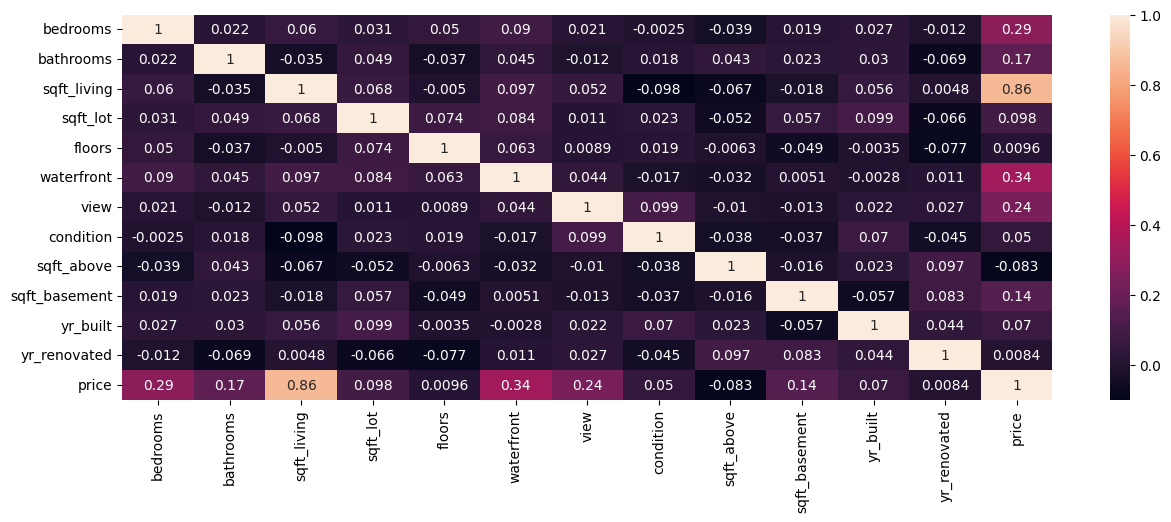

In [73]:
plt.figure(figsize=(15,5))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [48]:
x =dataset.iloc[:,:-1]
y=dataset["price"]

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
sc= StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
#linear Regression

In [53]:
lr= LinearRegression()
lr.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
lr.score(x_test,y_test)

0.9559735581188051

In [78]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

2169521301.09467
35494.963916772846
46578.12041178422


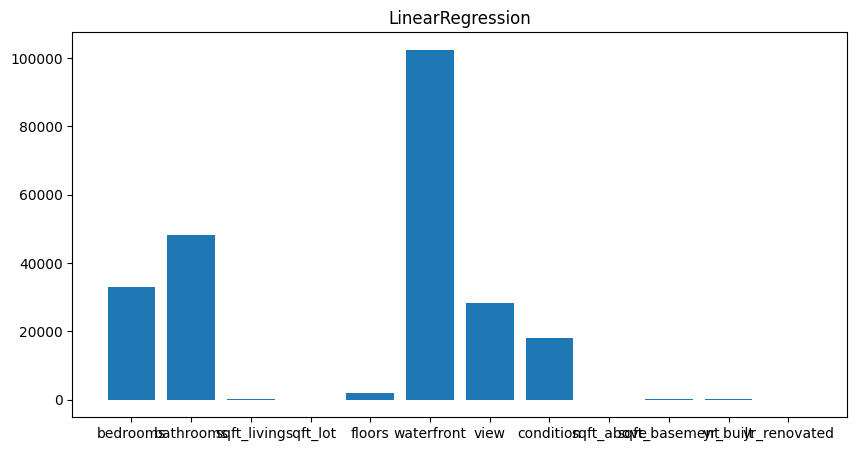

In [75]:
plt.figure(figsize=(10,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.show()

In [57]:
#lasso

In [67]:
la = Lasso(alpha=100)
la.fit(x_train,y_train)
la.score(x_test,y_test)

0.9561907977525281

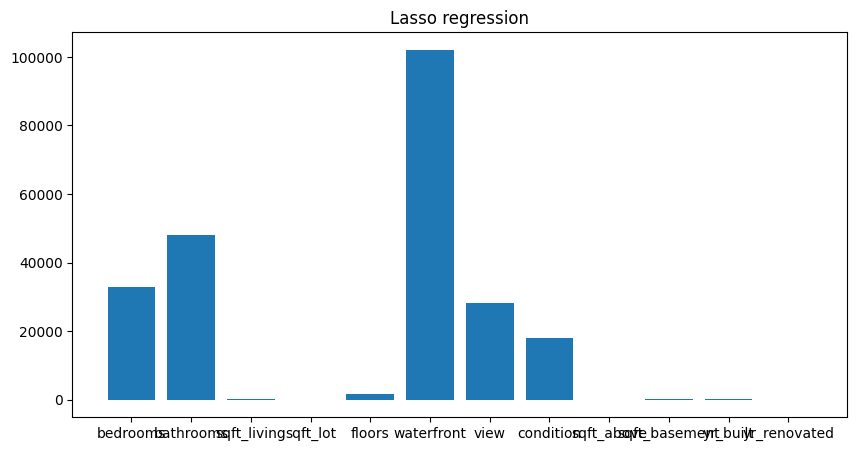

In [76]:
plt.figure(figsize=(10,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso regression")
plt.show()

In [79]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

2158816234.033473
35406.86345271462
46463.0631150538


In [60]:
#Ridge

In [65]:
lrd=Ridge(alpha=100)
lrd.fit(x_train,y_train)
lrd.score(x_test,y_test)

0.9524159889484596

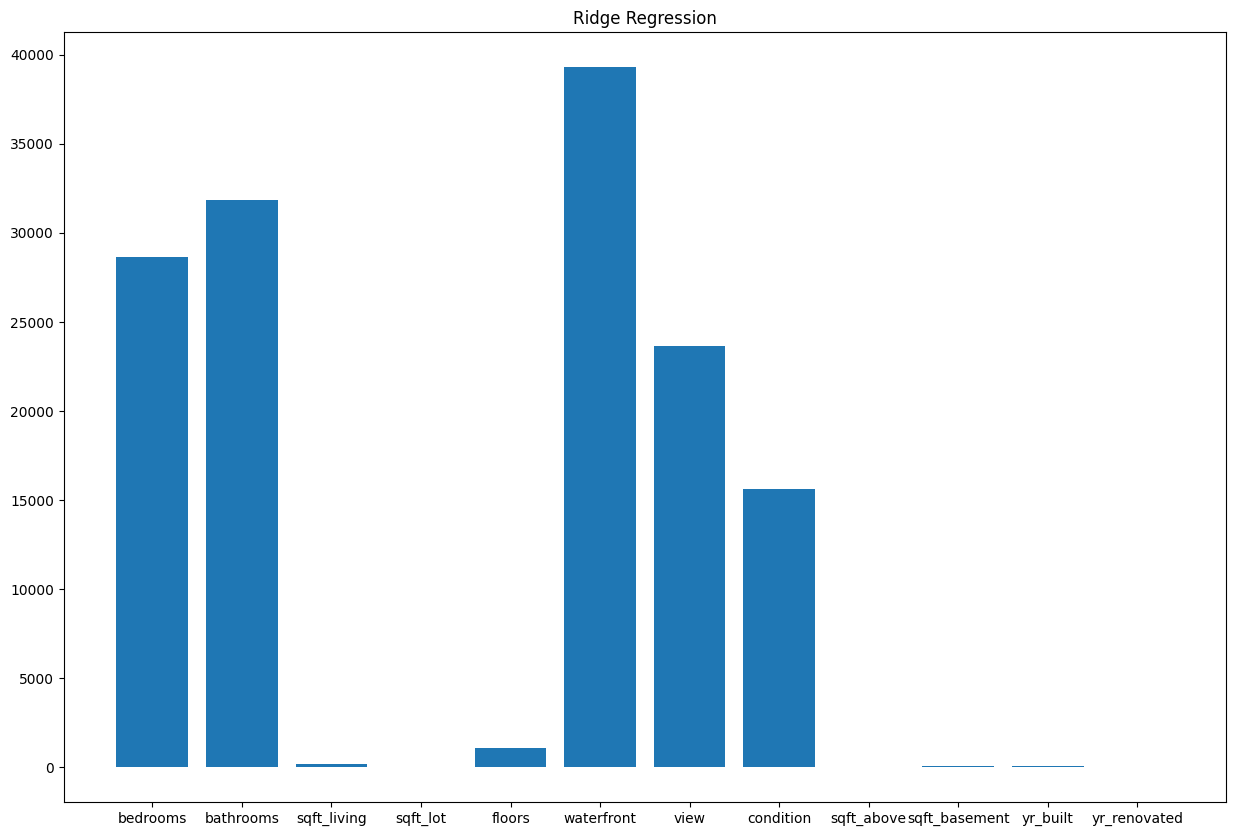

In [66]:
plt.figure(figsize=(15,10))
plt.bar(x.columns,lrd.coef_)
plt.title("Ridge Regression")
plt.show()

In [80]:
print(mean_squared_error(y_test,lrd.predict(x_test)))
print(mean_absolute_error(y_test,lrd.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lrd.predict(x_test))))

2344830087.48286
37952.93690348043
48423.44563827382


In [82]:
df =pd.DataFrame({"col_name":x.columns, "LinearReg": lr.coef_,"Lasso":la.coef_,"Ridge":lrd.coef_})

In [83]:
df

,col_name,LinearReg,Lasso,Ridge
0,bedrooms,32923.940758,32884.497547,28659.893330
1,bathrooms,48076.725640,47928.449927,31817.430722
2,sqft_living,153.963659,153.956961,155.068484
3,sqft_lot,-0.002270,-0.000509,0.169064
4,floors,1893.715271,1607.208542,1058.883616
5,waterfront,102460.837531,102102.079054,39301.838209
6,view,28256.526110,28211.215517,23629.924843
7,condition,18081.303613,18038.065327,15613.023561
8,sqft_above,-3.097327,-3.102825,-3.551031
9,sqft_basement,83.456722,83.408646,79.939655
